# **Graded Challenge 1**

Karel Gideon Anugrah Hutajulu | FTDS HCK-BATCH-004

## I. INTRODUCTION

### Objective

The objective of this study is to analyze and evaluate the relationship between Summer and Winter holidays in the United States and how it affects the amount of confirmed and death cases caused by COVID-19. 

This study aims to understand if there is a correlation between holidays and the spread of the virus. The study also aims to compare the impact of holidays on COVID-19 spread in 6 different states within the US.


---



### Problem Statement

Assessing the Impact of Public Holidays on Confirmed COVID-19 Cases in the United States: A Data Science Case Study

## II. USED LIBRARIES


###Importing pandas and matplotlib library

Before we began the case study, we will need to import the panda and matplotlib library.

The Pandas library provides easy-to-use data structures and data analysis tools and the matplotlib library will help us visualize the data into various types of plots and charts. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## III. DATA LOADING




### Querying our dataset

Firstly, we will use google cloud to query the data and only select the columns that is relevant to this case study.Below is the SQL query code, after running it we download the output and name it '2020_covid.csv'







In [4]:
'''
SELECT 

#Remove collumns that will not be used in this case study. Removed Columns are: Latitude, Longitude, Location_geom, fips,admin2 and combined_key

covdata.province_state,
covdata.country_region,
covdata.date,
covdata.confirmed,
covdata.deaths,
covdata.recovered,
covdata.active

FROM `bigquery-public-data.covid19_jhu_csse_eu.summary` AS covdata

WHERE

#Remove rows that contain null value

covdata.province_state IS NOT NULL 
AND covdata.country_region IS NOT NULL
AND covdata.date IS NOT NULL
AND covdata.confirmed IS NOT NULL
AND covdata.deaths IS NOT NULL
AND covdata.recovered IS NOT NULL
AND covdata.active IS NOT NULL

#Only selects rows that are in the Texas/California/Florida province

AND covdata.province_state IN ('Texas','California','Florida' , 'New York', 'Washington')

#Only select dates 2 weeks after the Chinese New Year Holiday starts
AND covdata.date BETWEEN '2020-01-01' AND '2020-12-31' 

'''


"\nSELECT \n\n#Remove collumns that will not be used in this case study. Removed Columns are: Latitude, Longitude, Location_geom, fips,admin2 and combined_key\n\ncovdata.province_state,\ncovdata.country_region,\ncovdata.date,\ncovdata.confirmed,\ncovdata.deaths,\ncovdata.recovered,\ncovdata.active\n\nFROM `bigquery-public-data.covid19_jhu_csse_eu.summary` AS covdata\n\nWHERE\n\n#Remove rows that contain null value\n\ncovdata.province_state IS NOT NULL \nAND covdata.country_region IS NOT NULL\nAND covdata.date IS NOT NULL\nAND covdata.confirmed IS NOT NULL\nAND covdata.deaths IS NOT NULL\nAND covdata.recovered IS NOT NULL\nAND covdata.active IS NOT NULL\n\n#Only selects rows that are in the Texas/California/Florida province\n\nAND covdata.province_state IN ('Texas','California','Florida' , 'New York', 'Washington')\n\n#Only select dates 2 weeks after the Chinese New Year Holiday starts\nAND covdata.date BETWEEN '2020-01-01' AND '2020-12-31' \n\n"

###Importing our dataset 

We will then import the dataset using the `"pd.read_csv"` because the dataset file format is CSV.



In [5]:
#Importing 2020 covid-19 data from query result in google cloud.

raw_data = pd.read_csv('2020_covid.csv')

To test if our dataset has been imported successfuly we use the `".head"` method to display the first 3 rows.

In [6]:
raw_data.head(3)

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Texas,US,2020-05-24,5,1,0,4.0
1,California,US,2020-05-24,84,2,0,82.0
2,Florida,US,2020-05-24,68,3,0,65.0


to see the last 3 rows we use `".tail"`

In [7]:
raw_data.tail(3)

,province_state,country_region,date,confirmed,deaths,recovered,active
91859,Texas,US,2020-07-07,573,6,0,567.0
91860,California,US,2020-07-07,94,1,0,93.0
91861,Texas,US,2020-07-07,2,0,0,NaN


Now that we have imported and verified our dataset we will move on to the next part, data cleaning. 

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. 

## IV. DATA CLEANING


Let us first display our 'raw_data' dataframe. As you can see, all the 'recovered' column diplayed in the table has a value of '0'. 

If all the 91,862 row of data has a 'recovered' value of 0,this column will not be usefull for our investigation.

In [8]:
raw_data

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Texas,US,2020-05-24,5,1,0,4.0
1,California,US,2020-05-24,84,2,0,82.0
2,Florida,US,2020-05-24,68,3,0,65.0
3,New York,US,2020-05-24,301,10,0,291.0
4,Texas,US,2020-05-24,8,0,0,8.0
...,...,...,...,...,...,...,...
91857,Texas,US,2020-07-07,15585,248,0,15337.0
91858,Florida,US,2020-07-07,102,1,0,101.0
91859,Texas,US,2020-07-07,573,6,0,567.0
91860,California,US,2020-07-07,94,1,0,93.0


### Dropping unused columns

To verify our assumption we will use the `".sum()"` method to calculate the sum of all the values in the 'recovered' column.





In [9]:
recovered_sum = raw_data['recovered']
recovered_sum.sum()

0

The `"sum "`returned the result 0. This means that ALL the values in the column recovered has a value of 0. 

To remove the 'recovered' column, we will use the `".drop"` method.

The drop() method removes the specified row or column. By specifying the axis ( axis 1 = columns , axis 0 = rows).

In [10]:
raw_data.drop('recovered',inplace=True, axis=1)

raw_data

,province_state,country_region,date,confirmed,deaths,active
0,Texas,US,2020-05-24,5,1,4.0
1,California,US,2020-05-24,84,2,82.0
2,Florida,US,2020-05-24,68,3,65.0
3,New York,US,2020-05-24,301,10,291.0
4,Texas,US,2020-05-24,8,0,8.0
...,...,...,...,...,...,...
91857,Texas,US,2020-07-07,15585,248,15337.0
91858,Florida,US,2020-07-07,102,1,101.0
91859,Texas,US,2020-07-07,573,6,567.0
91860,California,US,2020-07-07,94,1,93.0


Next, We will drop another column named 'Active'since in this case study we will only be needing the value of confirmed and death cases.

Another reason the active case is removed is because of the numerical value is wrong.

`"confirmed_cases"` should ALWAYS be > (More Than) `"active_case"`



---



***Why?***

A confirmed case of COVID-19 refers to a person who has tested positive for the virus. An active case, on the other hand, refers to a confirmed case who is currently experiencing symptoms or is contagious. 

In [11]:
raw_data.drop('active',inplace=True, axis=1)
raw_data

,province_state,country_region,date,confirmed,deaths
0,Texas,US,2020-05-24,5,1
1,California,US,2020-05-24,84,2
2,Florida,US,2020-05-24,68,3
3,New York,US,2020-05-24,301,10
4,Texas,US,2020-05-24,8,0
...,...,...,...,...,...
91857,Texas,US,2020-07-07,15585,248
91858,Florida,US,2020-07-07,102,1
91859,Texas,US,2020-07-07,573,6
91860,California,US,2020-07-07,94,1


### Checking data-types

Before we began exploring the data, we must first check if each column has the proper datatype. 

In [12]:
raw_data.dtypes

province_state    object
country_region    object
date              object
confirmed          int64
deaths             int64
dtype: object

Then we make sure that all null values are deleted with the `".dropna"` method. 

We will also convert the datatypes in column 'date' which is previously '**object**' to '**datetime64**'.


---



*Why?*

Because we will `"groupby"` the dates my month and a datetime64 datatype is required to do this.

In [13]:

raw_data['date'] = pd.to_datetime(raw_data['date'])

raw_data.dropna(subset=['confirmed'], inplace=True)

raw_data.dropna(subset=['deaths'], inplace=True)

raw_data.dtypes


province_state            object
country_region            object
date              datetime64[ns]
confirmed                  int64
deaths                     int64
dtype: object

### Categorizing Data



Now its time to categorize our data. In this investigation we will be adding 2 more columns



*   holiday_category 
(categorize data based on its date, if the date falls during the holiday period, it will be categorized as the holiday)
*   month
(categorize data based on its month)

Lets start by categorizing the holiday. In order to categorize the data, we use the `"if"` statement with the *holidayname*_start_date and *holidayname*_end_date as parameters.

We then use the `".apply"` method to apply a function along one of the axis of the DataFrame, default 0, which is the index (row) axis.


In [14]:
winter_start_date = pd.Timestamp("2020-11-15")
winter_end_date = pd.Timestamp("2021-01-17")

summer_start_date = pd.Timestamp("2020-06-20")
summer_end_date = pd.Timestamp("2020-08-22")

def categorize_date(date):
    if winter_start_date <= date <= winter_end_date:
        return "Winter Holiday"
    elif summer_start_date <= date <= summer_end_date:
        return "Summer Holiday"
    else:
        return "Not Categorized"

raw_data['holiday_category'] = raw_data['date'].apply(categorize_date)

raw_data

,province_state,country_region,date,confirmed,deaths,holiday_category
0,Texas,US,2020-05-24,5,1,Not Categorized
1,California,US,2020-05-24,84,2,Not Categorized
2,Florida,US,2020-05-24,68,3,Not Categorized
3,New York,US,2020-05-24,301,10,Not Categorized
4,Texas,US,2020-05-24,8,0,Not Categorized
...,...,...,...,...,...,...
91857,Texas,US,2020-07-07,15585,248,Summer Holiday
91858,Florida,US,2020-07-07,102,1,Summer Holiday
91859,Texas,US,2020-07-07,573,6,Summer Holiday
91860,California,US,2020-07-07,94,1,Summer Holiday


In [15]:
raw_data['month'] = raw_data['date'].dt.month 

raw_data.dropna(subset=['month'], inplace=True)

raw_data['month'] = raw_data['month'].astype(int)

raw_data

,province_state,country_region,date,confirmed,deaths,holiday_category,month
0,Texas,US,2020-05-24,5,1,Not Categorized,5
1,California,US,2020-05-24,84,2,Not Categorized,5
2,Florida,US,2020-05-24,68,3,Not Categorized,5
3,New York,US,2020-05-24,301,10,Not Categorized,5
4,Texas,US,2020-05-24,8,0,Not Categorized,5
...,...,...,...,...,...,...,...
91857,Texas,US,2020-07-07,15585,248,Summer Holiday,7
91858,Florida,US,2020-07-07,102,1,Summer Holiday,7
91859,Texas,US,2020-07-07,573,6,Summer Holiday,7
91860,California,US,2020-07-07,94,1,Summer Holiday,7


In [16]:
raw_data.describe()
#To check if there are any other anomalies in our data

,confirmed,deaths,month
count,91862.000000,91862.000000,91862.000000
mean,4669.634778,132.505073,7.999031
std,19933.297841,861.856883,2.620441
min,0.000000,0.000000,3.000000
25%,49.000000,1.000000,6.000000
50%,313.000000,7.000000,8.000000
75%,1670.000000,38.000000,10.000000
max,770602.000000,23689.000000,12.000000


We are finally done with cleaning the data! Now its time to explore   🔍🔍

In [17]:
clean_data = raw_data 

## V. DATA EXPLORATION



### Line Graph

We will start exploring our data with a line graph. This linegraph will compare the month and amount of confirmed cases. This will give us a bigger visual picture to begin with.

The `"X-AXIS"` will be the ***'month'*** that we categorized in the previous section

The `"Y-AXIS"` will be the ***'sum of confirmed cases based on each month'***

We then assign the result of the groupby into a dataframe. The 'month' would be our index(column) and 'confirmed' will be the values


In [18]:
grouped_data = clean_data.groupby("month", sort=True)["confirmed"].sum()

line_df = pd.DataFrame({'month': grouped_data.index, 'confirmed': grouped_data.values})

`"plt.plot"` is then used to plot the variables into a line graph.

***Parameter 1*** is an array containing the points on the x-axis. 
***Parameter 2*** is an array containing the points on the y-axis.

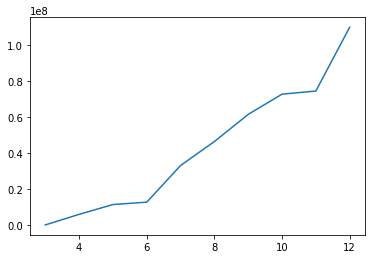

In [19]:
plt.plot(line_df.month , line_df.confirmed)

**Insight**: Lets take a look at the graph above, during the summer and winter holiday period [Month 6-8 and Month 10-12], we can see that the amount of confirmed case spiked (as shown by the slope of the line)

To see the how the trend differs in each state we will plot each line based on each state

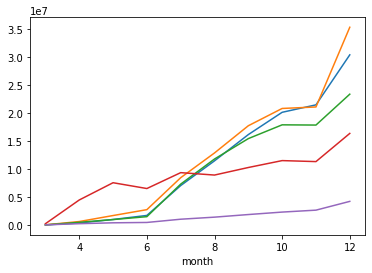

In [20]:
clean_data[clean_data["province_state"] == "Texas"].groupby("month")["confirmed"].sum().plot()
clean_data[clean_data["province_state"] == "California"].groupby("month")["confirmed"].sum().plot()
clean_data[clean_data["province_state"] == "Florida"].groupby("month")["confirmed"].sum().plot()
clean_data[clean_data["province_state"] == "New York"].groupby("month")["confirmed"].sum().plot()
clean_data[clean_data["province_state"] == "Washington"].groupby("month")["confirmed"].sum().plot()

If you look at the line graph, you will notice that all the states have a increase in confirmed cases over the month. 

We can also say that some states have a higher percentage increase than others (as shown by the different `"slope"` of each line)

**Percentage change and slope**

Now lets focus on just the winter and summer holidays. Winter Holiday has the highest increase total sum of confirmed case and has a bigger slope compared to summer holiday. But lets find the percentage difference between these 2 holidays.

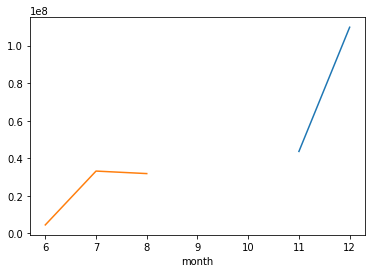

In [21]:
winter1 = clean_data[clean_data["holiday_category"] == "Winter Holiday"].groupby("month")["confirmed"].sum().plot()
summer1 = clean_data[clean_data["holiday_category"] == "Summer Holiday"].groupby("month")["confirmed"].sum().plot()

To find the percentage increase we use:

In [22]:

after_summer_holiday = clean_data['date'] < summer_end_date

sum_after_summer = clean_data.loc[after_summer_holiday, 'confirmed'].sum()


after_winter_holiday = clean_data['date'] < winter_end_date

sum_after_winter = clean_data.loc[after_winter_holiday, 'confirmed'].sum()



In [23]:
before_summer_holiday = clean_data['date'] < summer_start_date

sum_before_summer = clean_data.loc[before_summer_holiday, 'confirmed'].sum()


before_winter_holiday = clean_data['date'] < winter_start_date

sum_before_winter = clean_data.loc[before_winter_holiday, 'confirmed'].sum()


In [24]:
percentage_change = ((sum_after_summer - sum_before_summer) / sum_before_summer) * 100

print("Percentage change Summer: {:.2f}%".format(percentage_change))


percentage_change2 = ((sum_after_winter - sum_before_winter) / sum_before_winter) * 100

print("Percentage change Winter: {:.2f}%".format(percentage_change2))

Percentage change Summer: 263.72%
Percentage change Winter: 55.67%


In [25]:
holiday_infected_difference = (sum_after_winter - sum_before_winter) - (sum_after_summer - sum_before_summer) 
holiday_infected_difference

83835239

### Scatter Plot

Now we will use a scatter plot to compare the confirmed case with the deaths case and the month.

Simillar to the previous graph, we use `".groupby"` to group the confirmed and death data according to the month categories and we apply a sum function to the categories.

The `"reset_index()"` method allows us to reset the index back to the default 0, 1, 2 etc indexes. We do this so that we could display'month'.

In [26]:
df_grouped = clean_data.groupby('month')['confirmed','deaths'].sum().reset_index()

df_3 = pd.DataFrame(df_grouped)

df_3= df_3.rename(columns={ 'confirmed':'confirmed_perday',
                            'deaths':'deaths_perday'})

#We divide the confirmed_perday value by 100000 so that the size of the dots in the scatter plotwill not get too big.
df_3['confirmed_perday'] = df_3['confirmed_perday'] / 100000

df_3


<ipython-input-26-7c9df65cbc8c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grouped = clean_data.groupby('month')['confirmed','deaths'].sum().reset_index()


,month,confirmed_perday,deaths_perday
0,3,2.94145,4627
1,4,61.42441,350491
2,5,115.77741,760336
3,6,128.96772,716609
4,7,331.90924,1159556
5,8,464.66374,1368831
6,9,614.94590,1777193
7,10,727.06407,2042307
8,11,744.31199,1853244
9,12,1097.61397,2138987


We use the `"scatter()"` method with the following parameters: 


*   x_axis_data- An array containing x-axis data

*   y_axis_data- An array containing y-axis data



*   s-marker size (can be scalar or array of size equal to size of x or y)
* alpha-blending value, between 0 (transparent) and 1 (opaque)

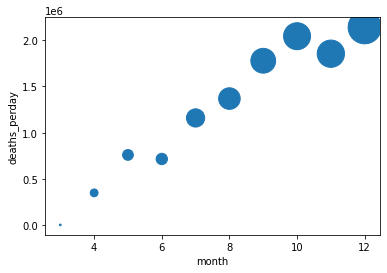

In [27]:
df_3.plot(kind='scatter', x='month', y='deaths_perday', s='confirmed_perday', alpha=1)

plt.show()

The scatter plot shows a strong positive association. As the month goes by, the death and confirmed cases goes up too.

### Bar Graph

In [28]:
clean_data

,province_state,country_region,date,confirmed,deaths,holiday_category,month
0,Texas,US,2020-05-24,5,1,Not Categorized,5
1,California,US,2020-05-24,84,2,Not Categorized,5
2,Florida,US,2020-05-24,68,3,Not Categorized,5
3,New York,US,2020-05-24,301,10,Not Categorized,5
4,Texas,US,2020-05-24,8,0,Not Categorized,5
...,...,...,...,...,...,...,...
91857,Texas,US,2020-07-07,15585,248,Summer Holiday,7
91858,Florida,US,2020-07-07,102,1,Summer Holiday,7
91859,Texas,US,2020-07-07,573,6,Summer Holiday,7
91860,California,US,2020-07-07,94,1,Summer Holiday,7


Lastly, we use a bar graph to compare the amount of confirmed cases towards the winter and summer holiday. We can see that the Winter Holiday has more confirmed cases and deaths compared to the summer Holiday

<ipython-input-29-ae70010590c6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grouped = clean_data.groupby('holiday_category')['confirmed','deaths'].sum().reset_index()


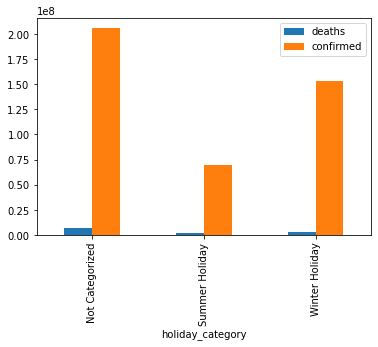

In [29]:
df_grouped = clean_data.groupby('holiday_category')['confirmed','deaths'].sum().reset_index()

df_4 = pd.DataFrame(df_grouped)

df_4.plot(x="holiday_category", y=["deaths", "confirmed"], kind="bar")

#VI.Conclusions, Assumptions, Overall Analysis

There are a lot of factors that could contribute to the spread of COVID-19. However, this study provided evidence that social gatherings (such as the summer and winter holiday) causes the slope of confirmed cases to drastically rise. Meaning, for every day during a public holiday, the number of confirmed cases increase more compared to during a normal day.


---


This study also show the domino effect of Covid-19. Although the percentage increase of confirmed cases in the summer holiday is more significant than in the winter holiday, the total amount of people infected during the winter holiday is far greater.


---


Lastly, this study also proves that there is a directly proportional correlation between amount of confirmed cases vs deaths (as shown on the scatter plot)